In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [47]:
import numpy as np
import pandas as pd

In [48]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [50]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables

['measurement', 'station']

In [52]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [53]:
# We can view all of the classes that automap found
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [54]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [59]:
# Save references to each table
st = Base.classes.station
print(st)

<class 'sqlalchemy.ext.automap.station'>


In [60]:
ms = Base.classes.measurement
print(ms)

<class 'sqlalchemy.ext.automap.measurement'>


In [61]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [63]:
# Calculate the date 1 year ago from the last data point in the database
# Find the last date, then convert to date, subtract 365 days, then convert back to string.
maxdate = session.query(func.max(func.strftime("%Y-%m-%d", ms.date))).all()
tmpdate = list(np.ravel(maxdate))[0]
tmpdate = dt.datetime.strptime(tmpdate, '%Y-%m-%d')
tmpdate
year = dt.timedelta(days=365)
begdate = tmpdate - year
begdate
enddate = tmpdate
enddate
print( begdate, enddate)

2016-08-23 00:00:00 2017-08-23 00:00:00


In [64]:
# Design a query to retrieve the last 12 months of precipitation data
station_data = session.query(ms.date, ms.prcp).\
filter(ms.date >= begdate)

In [65]:
# Save the query results as a Pandas DataFrame and set the index to the date column
raindata = pd.DataFrame(station_data)


In [66]:
# Sort the dataframe by date
raindata = raindata.set_index("date")
raindata = raindata.sort_index(ascending = True)
raindata

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


Text(0.5, 1.0, 'Year Long Preciptation')

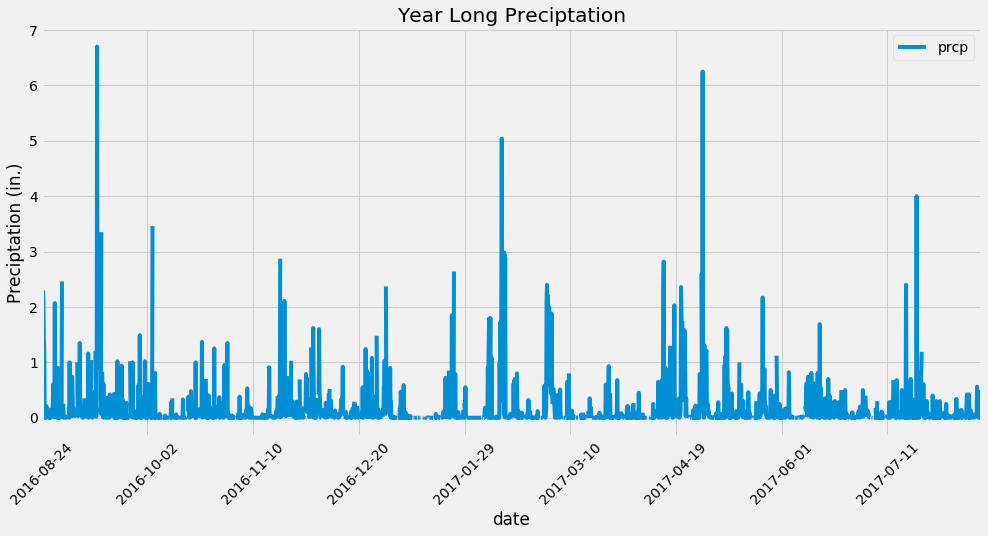

In [67]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (15, 7))
raindata.plot(ax = ax, x_compat = True, rot=45)
ax.set_ylabel('Preciptation (in.)')
ax.set_title("Year Long Preciptation")

# Exploratory Climate Analysis

In [68]:
# Use Pandas to calcualte the summary statistics for the precipitation data
raindata.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [75]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(st.station).group_by(st.station).count()
station_count

9

In [92]:
# List the stations and the counts in descending order.
active_stations = session.query(ms.station, func.count (ms.station)).\
group_by((ms.station)).\
order_by(func.count(ms.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [90]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_stations[0][0]

'USC00519281'

In [96]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
hot_stations = session.query(ms.tobs, func.min (ms.tobs))
#group_by((ms.station)).\
# highest temperature recorded, and average temperature of the most active station?
hot_stations

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
